In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

**This first cell imports all the essential libraries needed for the project. We import TensorFlow for building the model, OpenCV for image processing, and Matplotlib for plotting results.**

In [5]:
uploaded = files.upload()

Saving Facial_expression.zip to Facial_expression (1).zip


In [6]:
import zipfile
import os

zip_path = 'Facial_expression.zip'
extract_dir = 'Facial_Expressions'  # target directory

# Create directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Unzipped contents:", os.listdir(extract_dir))

Unzipped contents: ['archive']


In [7]:
train_data_dir = '/content/Facial_Expressions/archive/train'
validation_data_dir = '/content/Facial_Expressions/archive/test'
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**This block prepares the data for training using the ImageDataGenerator. This automatically reads images, resizes them, and applies data augmentation to the training set to help the model generalize better.**

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,114,503 (19.51 MB)

 Trainable params: 5,112,519 (19.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

**This block defines the architecture of our Convolutional Neural Network (CNN). It consists of several convolutional blocks that extract features from the images, followed by BatchNormalization to stabilize training and Dropout to prevent overfitting. The final layers classify the features into one of the seven emotion categories.**

In [9]:
epochs = 100

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=0.00001)
callbacks = [early_stopping, reduce_lr]

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)

model.save('facial_expression_model.keras')

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 43s 70ms/step - accuracy: 0.2308 - loss: 2.3258 - val_accuracy: 0.2882 - val_loss: 1.8142 - learning_rate: 0.0010
Epoch 2/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.3483 - loss: 1.6786 - val_accuracy: 0.4380 - val_loss: 1.4656 - learning_rate: 0.0010
Epoch 3/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.4243 - loss: 1.4960 - val_accuracy: 0.3771 - val_loss: 13.3882 - learning_rate: 0.0010
Epoch 4/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.4556 - loss: 1.4060 - val_accuracy: 0.5228 - val_loss: 1.2657 - learning_rate: 0.0010
Epoch 5/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.4734 - loss: 1.3614 - val_accuracy: 0.4720 - val_loss: 1.4513 - learning_rate: 0.0010
Epoch 6/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.5001 - loss: 1.3218 - val_accuracy: 0.5284 - val_loss: 1.4446 - learning_rate: 0.0010
Epoch 7/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.5106 - loss:

**This section handles the model training. We compile the model with the Adam optimizer and categorical crossentropy loss function. The training process uses EarlyStopping to automatically stop when the model's performance on the validation set no longer improves, ensuring we get the best version of the model without overfitting. After training, it saves the model.**

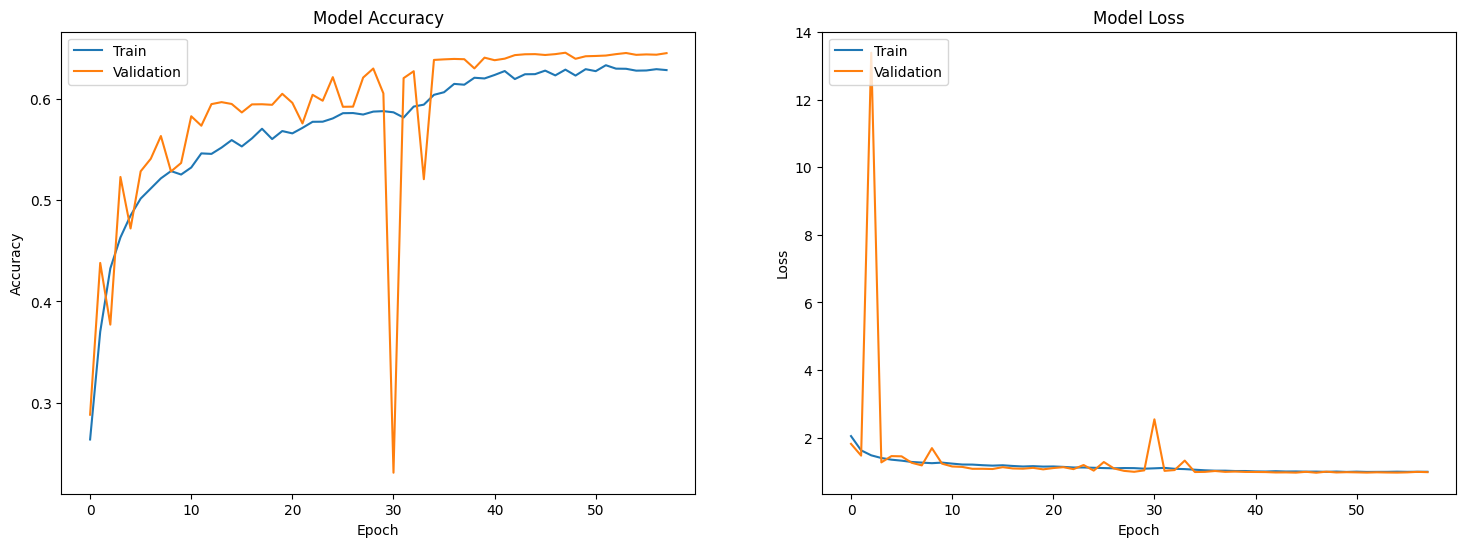

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

**After training, this code visualizes the model's performance. It plots the accuracy and loss for both the training and validation data across each epoch.**

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# This is the model that achieved 65% accuracy
model = load_model('model_file_improved.keras')

video = cv2.VideoCapture(0)
faceDetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

labels_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

while True:
    ret, frame = video.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceDetect.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        sub_face_img = gray[y:y+h, x:x+w]
        resized = cv2.resize(sub_face_img, (48, 48))
        normalize = resized / 255.0
        reshaped = np.reshape(normalize, (1, 48, 48, 1))
        result = model.predict(reshaped)
        label = np.argmax(result, axis=1)[0]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        cv2.rectangle(frame, (x, y - 40), (x+w, y), (0, 0, 255), -1)
        cv2.putText(frame, labels_dict[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    cv2.imshow("Live Emotion Detection", frame)

    # Breaks the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()